In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/205-001 (77).dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/1-236.dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/62-001 (117).dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/1-121.dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/100-001 (231).dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/1-186.dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/100-001 (126).dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/28-001 (57).dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid/benign/62-001 (95).dcm.png
/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_

In [3]:
import tensorflow as tf
import numpy as np
import cv2
import os
import numpy as np
import pandas as pd
import imageio
import random
import matplotlib.pyplot as plt
import keras
import tensorflow.keras as K
import tensorflow.keras.backend as Kback

from keras import layers
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Conv2DTranspose
from keras.layers import concatenate
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.applications.resnet import ResNet50
from keras.applications import vgg16
from keras.applications import inception_v3
from keras.src.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import DenseNet121, NASNetMobile, EfficientNetB0, Xception
from keras.layers import GlobalAveragePooling2D
from keras.applications.densenet import DenseNet121

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight


from collections import Counter
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [4]:
# ! unzip /content/chest-ctscan-images.zip





# **Data PreProcessing**

In [5]:
# ! mkdir ~/.kaggle
# !cp /content/drive/MyDrive/KaggleAPI/kaggle.json ~/.kaggle/kaggle.json

# ! chmod 600 ~/.kaggle/kaggle.json

# ! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images




# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train="/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/train"
x_test="/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/test"
x_valid="/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/valid"
# Normalize pixel values to be between 0 and 1
# x_train, x_test,x_valid = x_train / 255.0, x_test / 255.0, x_valid/255.0

# ! unzip /content/chest-ctscan-images.zip



# Define function to count number of images per class using a dictionary
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # count files in the folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

# Get the number of images per class in each set (train, validation and test)
train_set = GetDatasetSize(x_train)
val_set = GetDatasetSize(x_valid)
test_set = GetDatasetSize(x_test)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'benign': 650, 'malignant': 673} 

 {'benign': 162, 'malignant': 168} 

 {'benign': 203, 'malignant': 210}


In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
train_data = train_datagen.flow_from_directory(x_train,
                                                   batch_size = 5,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical')
train_data.class_indices
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(x_valid,
                                                   batch_size = 5,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical')
val_data.class_indices
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = val_datagen.flow_from_directory(x_test,
                                                   batch_size = 5,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical')
test_data.class_indices


Found 1323 images belonging to 2 classes.
Found 330 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

In [7]:
import tensorflow as tf
import numpy as np
import cv2
import os
import numpy as np
import pandas as pd
import imageio
import random
import matplotlib.pyplot as plt
import keras
import tensorflow.keras as K
import tensorflow.keras.backend as Kback

from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Conv2DTranspose
from keras.layers import concatenate
from keras.layers import BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.applications.resnet import ResNet50
from keras.applications import vgg16
from keras.applications import inception_v3
from keras.src.applications.vgg16 import VGG16
from keras.applications import DenseNet121, NASNetMobile, EfficientNetB0, Xception
from keras.layers import GlobalAveragePooling2D

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight

from collections import Counter

In [8]:
test_path_str="/kaggle/input/lung-cancer-detection-lidc-idri-subset/LIDC_IDRI_PNG_CONV/test"
test_classes = os.listdir(test_path_str)

In [9]:
num_classes = len(train_data.class_indices)

In [10]:
import keras_tuner as kt
from keras.applications import VGG16
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# **RESNET**

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

=-----------------------------------------------
Epoch 1/50
  5/265 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4887 - loss: 1.5193

W0000 00:00:1719917476.152203     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


202/265 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6434 - loss: 0.6934

W0000 00:00:1719917487.267472     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6626 - loss: 0.6542

W0000 00:00:1719917493.372918     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.6632 - loss: 0.6531 - val_accuracy: 0.7909 - val_loss: 0.3627
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8327 - loss: 0.3785 - val_accuracy: 0.9455 - val_loss: 0.2239
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8841 - loss: 0.2504 - val_accuracy: 0.8939 - val_loss: 0.2270
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8734 - loss: 0.2826 - val_accuracy: 0.9152 - val_loss: 0.1851
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9426 - loss: 0.1430 - val_accuracy: 0.9242 - val_loss: 0.1473
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9219 - loss: 0.1756 - val_accuracy: 0.9485 - val_loss: 0.1236
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9234 - loss: 0.1653 - val_accuracy: 0.9182 - val_loss: 0.1773
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9342 - loss: 0.1537 - val_accurac

W0000 00:00:1719917981.246754     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.09234807640314102
Test Accuracy: 0.9539951682090759
 8/83 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

W0000 00:00:1719917984.971735     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step


W0000 00:00:1719917990.564752     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.48      0.43      0.45       203
           1       0.50      0.54      0.52       210

    accuracy                           0.49       413
   macro avg       0.49      0.49      0.49       413
weighted avg       0.49      0.49      0.49       413



Confusion Matrix:
 [[ 88 115]
 [ 96 114]]


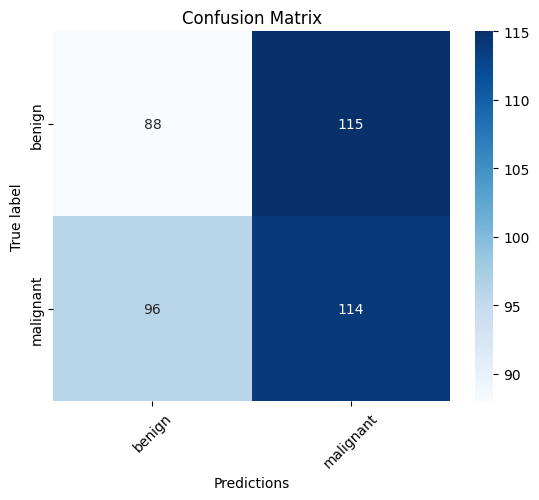

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

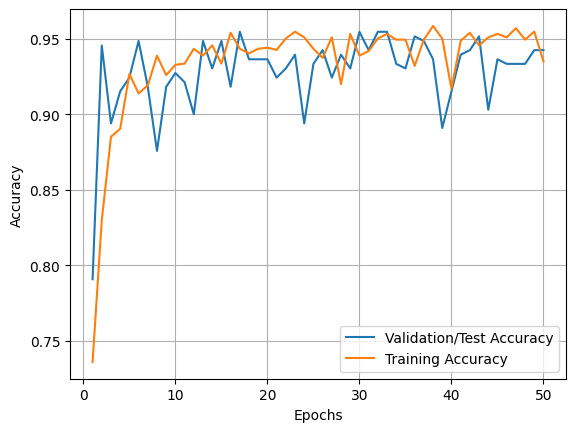

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

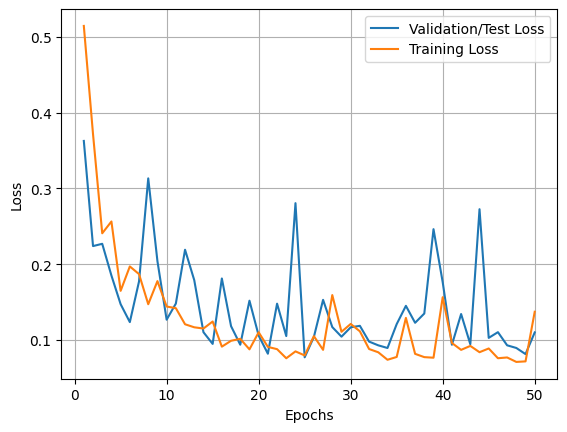

In [31]:
# Load the base ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()





In [32]:




# Load the base ResNet50 model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)

In [ ]:
#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()







# **VGG16**

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

=-----------------------------------------------
Epoch 1/50
  5/265 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5620 - loss: 0.7144 

W0000 00:00:1719918005.232844     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


247/265 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7548 - loss: 0.4716

W0000 00:00:1719918019.875502     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7605 - loss: 0.4624

W0000 00:00:1719918021.605770     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.7608 - loss: 0.4620 - val_accuracy: 0.9424 - val_loss: 0.1620
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9297 - loss: 0.1569 - val_accuracy: 0.9545 - val_loss: 0.1477
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9544 - loss: 0.1137 - val_accuracy: 0.9515 - val_loss: 0.1486
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9515 - loss: 0.1064 - val_accuracy: 0.9273 - val_loss: 0.2315
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9480 - loss: 0.1125 - val_accuracy: 0.9242 - val_loss: 0.1332
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9481 - loss: 0.0997 - val_accuracy: 0.9303 - val_loss: 0.1977
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9440 - loss: 0.0972 - val_accuracy: 0.9303 - val_loss: 0.2316
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9615 - loss: 0.0714 - val_accurac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9649 - loss: 0.0588 - val_accuracy: 0.9121 - val_loss: 0.1102
Epoch 29/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9548 - loss: 0.0715 - val_accuracy: 0.8939 - val_loss: 0.3462
Epoch 30/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9529 - loss: 0.0794 - val_accuracy: 0.9182 - val_loss: 0.1089
Epoch 31/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9463 - loss: 0.0788 - val_accuracy: 0.9152 - val_loss: 0.1238
Epoch 32/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9592 - loss: 0.0616 - val_accuracy: 0.9273 - val_loss: 0.1779
Epoch 33/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9596 - loss: 0.0626 - val_accuracy: 0.9303 - val_loss: 0.1145
Epoch 34/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9549 - loss: 0.1113 - val_accuracy: 0.9152 - val_loss: 0.1694
Epoch 35/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9580 - loss: 0.0798 - val_

W0000 00:00:1719918601.234174     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.10014119744300842
Test Accuracy: 0.9491525292396545
 8/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step

W0000 00:00:1719918602.071992     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step


W0000 00:00:1719918605.228229     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.52      0.48      0.50       203
           1       0.53      0.56      0.55       210

    accuracy                           0.52       413
   macro avg       0.52      0.52      0.52       413
weighted avg       0.52      0.52      0.52       413



Confusion Matrix:
 [[ 98 105]
 [ 92 118]]


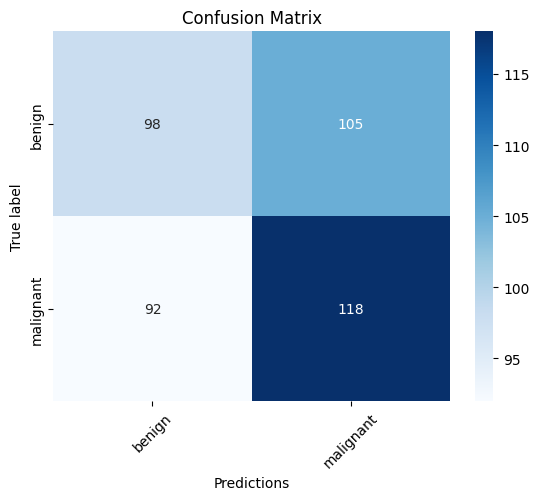

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

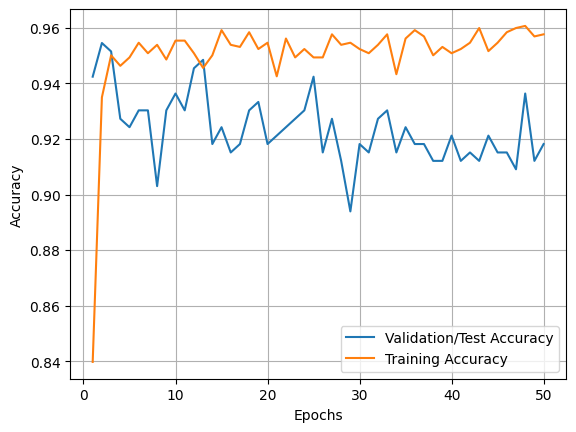

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

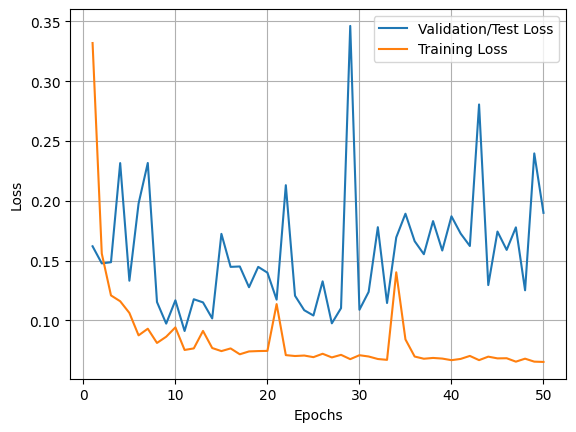

In [33]:


base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()







# **VGG19**

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

=-----------------------------------------------
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/265 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.5125 - loss: 0.8511

I0000 00:00:1719938937.962572     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719938937.984500     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7529 - loss: 0.5037

W0000 00:00:1719938956.454480     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719938957.686223     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.7532 - loss: 0.5032 - val_accuracy: 0.9273 - val_loss: 0.1844
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9387 - loss: 0.1687 - val_accuracy: 0.8727 - val_loss: 0.4032
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.9443 - loss: 0.1470 - val_accuracy: 0.9545 - val_loss: 0.1765
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.9479 - loss: 0.1263 - val_accuracy: 0.9303 - val_loss: 0.1868
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.9573 - loss: 0.0955 - val_accuracy: 0.9242 - val_loss: 0.2168
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9502 - loss: 0.1220 - val_accuracy: 0.9242 - val_loss: 0.1095
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.9540 - loss: 0.0852 - val_accuracy: 0.9273 - val_loss: 0.1771
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.9569 - loss: 0.0847 - val_accurac

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9497 - loss: 0.0732


W0000 00:00:1719939654.906623     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.07378596067428589
Test Accuracy: 0.9515738487243652
 5/83 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step

W0000 00:00:1719939655.747223     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step


W0000 00:00:1719939659.594704     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.49      0.46      0.47       203
           1       0.51      0.54      0.53       210

    accuracy                           0.50       413
   macro avg       0.50      0.50      0.50       413
weighted avg       0.50      0.50      0.50       413



Confusion Matrix:
 [[ 93 110]
 [ 96 114]]


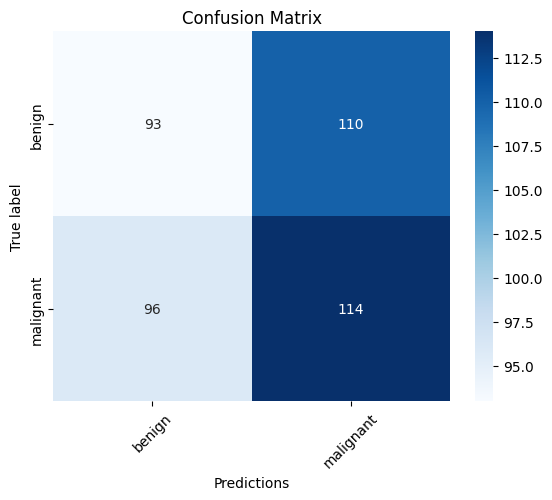

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

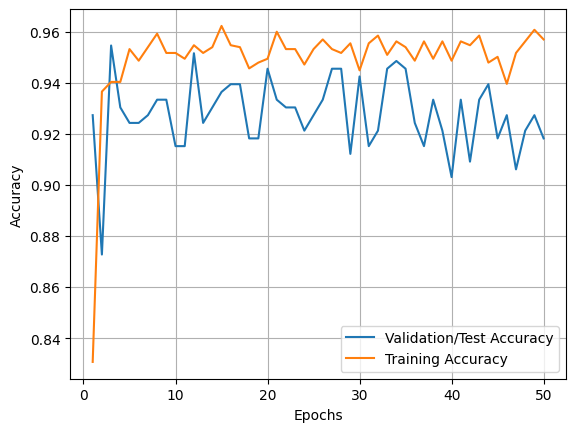

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

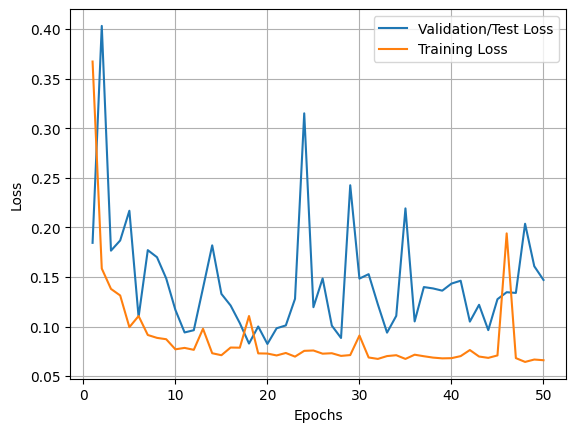

In [10]:
# Load the base ResNet50 model
base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()






# **InceptionV3**

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

=-----------------------------------------------
Epoch 1/50
  5/265 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4967 - loss: 1.6293   

W0000 00:00:1719939682.371152     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/265 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.7348 - loss: 0.8326

W0000 00:00:1719939696.392934     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7586 - loss: 0.7465

W0000 00:00:1719939704.177146     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.7591 - loss: 0.7445 - val_accuracy: 0.8788 - val_loss: 0.3852
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9020 - loss: 0.2572 - val_accuracy: 0.9152 - val_loss: 0.2475
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9330 - loss: 0.1989 - val_accuracy: 0.9121 - val_loss: 0.2711
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9473 - loss: 0.1566 - val_accuracy: 0.8909 - val_loss: 0.2750
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9478 - loss: 0.1270 - val_accuracy: 0.9061 - val_loss: 0.3611
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9447 - loss: 0.1112 - val_accuracy: 0.8727 - val_loss: 0.4093
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9504 - loss: 0.1135 - val_accuracy: 0.8515 - val_loss: 0.4645
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9458 - loss: 0.1339 - val_accuracy: 0.89

W0000 00:00:1719940134.359059     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.26599735021591187
Test Accuracy: 0.9249394536018372
 8/83 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

W0000 00:00:1719940139.979797     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step


W0000 00:00:1719940147.391000     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.51      0.55      0.53       203
           1       0.53      0.49      0.51       210

    accuracy                           0.52       413
   macro avg       0.52      0.52      0.52       413
weighted avg       0.52      0.52      0.52       413



Confusion Matrix:
 [[111  92]
 [107 103]]


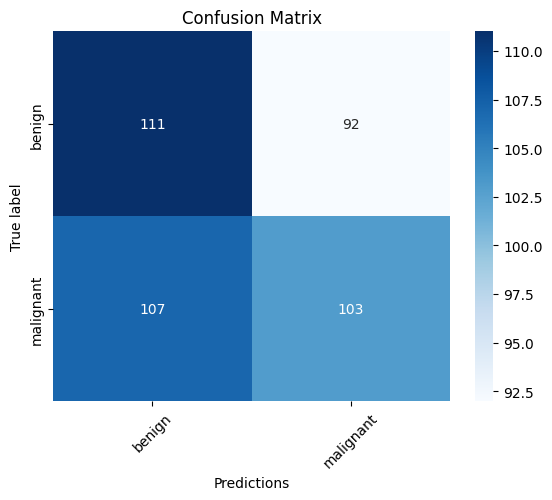

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

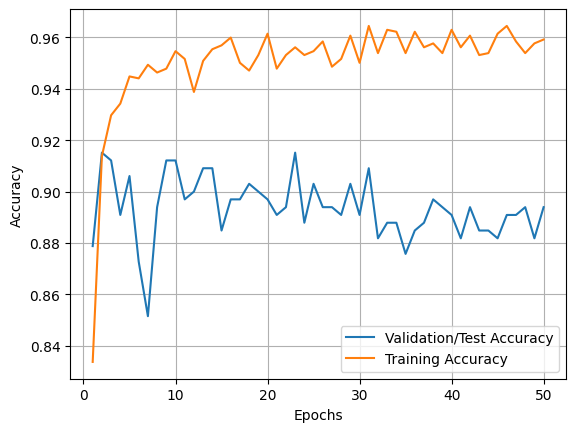

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

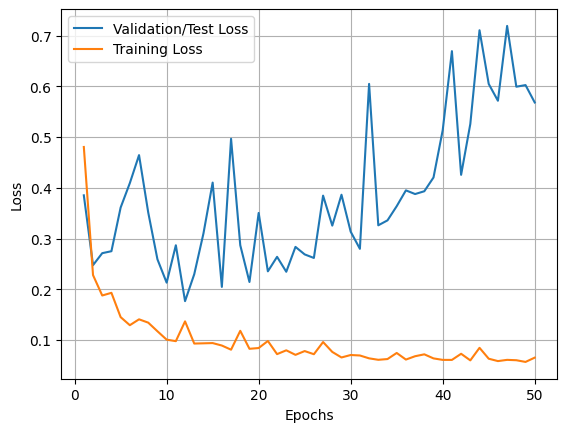

In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
# Load the base ResNet50 model
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data,verbose=1)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()




# **MobileNETV2**

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

=-----------------------------------------------
Epoch 1/50
  6/265 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7178 - loss: 2.7588 

W0000 00:00:1719940161.711334     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


165/265 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.7703 - loss: 0.9055

W0000 00:00:1719940169.973276     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8000 - loss: 0.7371

W0000 00:00:1719940175.812593     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8005 - loss: 0.7346 - val_accuracy: 0.9303 - val_loss: 0.2346
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9362 - loss: 0.1823 - val_accuracy: 0.9121 - val_loss: 0.2637
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9580 - loss: 0.1510 - val_accuracy: 0.9000 - val_loss: 0.2938
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9380 - loss: 0.1923 - val_accuracy: 0.9364 - val_loss: 0.3306
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9439 - loss: 0.1671 - val_accuracy: 0.9273 - val_loss: 0.1494
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9613 - loss: 0.0812 - val_accuracy: 0.9152 - val_loss: 0.2537
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9424 - loss: 0.1032 - val_accuracy: 0.9152 - val_loss: 0.2614
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9491 - loss: 0.0989 - val_accuracy: 0.9

W0000 00:00:1719940598.460706     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.14384959638118744
Test Accuracy: 0.9467312097549438
 8/83 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

W0000 00:00:1719940601.658023     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step


W0000 00:00:1719940606.539385     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.48      0.50      0.49       203
           1       0.50      0.48      0.49       210

    accuracy                           0.49       413
   macro avg       0.49      0.49      0.49       413
weighted avg       0.49      0.49      0.49       413



Confusion Matrix:
 [[102 101]
 [109 101]]


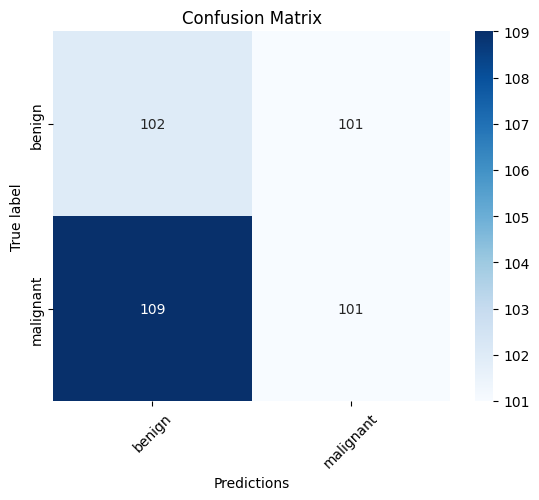

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

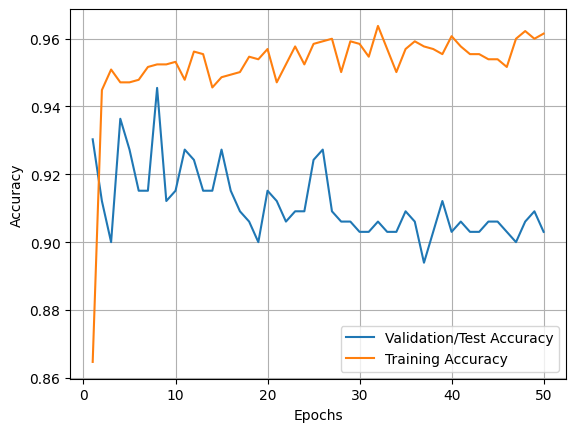

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

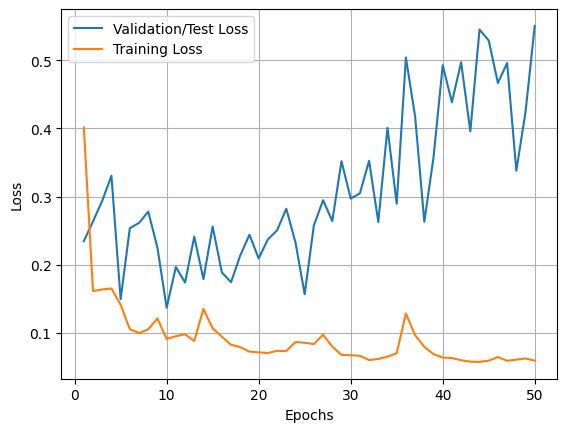

In [12]:


# Load the base ResNet50 model
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()







# **MobileNetV3**

In [20]:
from tensorflow.keras.applications import MobileNetV3

# Instantiate MobileNetV2
model = MobileNetV3(weights='imagenet', include_top=True)


base_model = MobileNetV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()




ImportError: cannot import name 'MobileNetV3' from 'tensorflow.keras.applications' (/opt/conda/lib/python3.10/site-packages/keras/_tf_keras/keras/applications/__init__.py)

# **Alexnet**

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization

# Create the AlexNet model
alexnet_model = Sequential()

# 1st Convolutional Layer
alexnet_model.add(Conv2D(filters=96, input_shape=(224, 224, 3),
                 kernel_size=(11, 11), strides=(4, 4), padding='valid'))
alexnet_model.add(Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
alexnet_model.add(BatchNormalization())

# 2nd Convolutional Layer
alexnet_model.add(Conv2D(filters=256, kernel_size=(11, 11),
                 strides=(1, 1), padding='valid'))
alexnet_model.add(Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
alexnet_model.add(BatchNormalization())

# 3rd, 4th, and 5th Convolutional Layers
alexnet_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
alexnet_model.add(Activation('relu'))
alexnet_model.add(BatchNormalization())

alexnet_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
alexnet_model.add(Activation('relu'))
alexnet_model.add(BatchNormalization())

alexnet_model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
alexnet_model.add(Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Fully Connected Layers
alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096))
alexnet_model.add(Activation('relu'))
alexnet_model.add(Dropout(0.5))

alexnet_model.add(Dense(4096))
alexnet_model.add(Activation('relu'))
alexnet_model.add(Dropout(0.5))

# Output layer
alexnet_model.add(Dense(1000, activation='softmax'))  # Assuming 1000 classes for ImageNet

# Compile the model
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(alexnet_model)
resnet_model.add(Flatten())
# resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()





/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │    28,041,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,041,960 (106.97 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 28,041,960 (106.97 MB)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │    28,041,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,041,960 (106.97 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 28,041,960 (106.97 MB)

=-----------------------------------------------
Epoch 1/50


ValueError: Cannot get result() since the metric has not yet been built.

# **DENSENET**

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

=-----------------------------------------------
Epoch 1/50
  5/265 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6573 - loss: 1.6149 

W0000 00:00:1719940678.506456     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 64/265 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.6799 - loss: 0.9500

W0000 00:00:1719940693.833706     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7789 - loss: 0.5936

W0000 00:00:1719940708.831925     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.7794 - loss: 0.5921 - val_accuracy: 0.9242 - val_loss: 0.2057
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9037 - loss: 0.2332 - val_accuracy: 0.9364 - val_loss: 0.1610
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9165 - loss: 0.1997 - val_accuracy: 0.9303 - val_loss: 0.1690
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9334 - loss: 0.1554 - val_accuracy: 0.8727 - val_loss: 0.3869
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9463 - loss: 0.1251 - val_accuracy: 0.9303 - val_loss: 0.1611
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9557 - loss: 0.1181 - val_accuracy: 0.9242 - val_loss: 0.1831
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9463 - loss: 0.1081 - val_accuracy: 0.9000 - val_loss: 0.1630
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9474 - loss: 0.1072 - val_accuracy: 0.9

W0000 00:00:1719941155.435318     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.10683102160692215
Test Accuracy: 0.9515738487243652
 9/83 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

W0000 00:00:1719941166.821688     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step


W0000 00:00:1719941178.037697     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.48      0.45      0.46       203
           1       0.50      0.52      0.51       210

    accuracy                           0.49       413
   macro avg       0.49      0.49      0.49       413
weighted avg       0.49      0.49      0.49       413



Confusion Matrix:
 [[ 92 111]
 [101 109]]


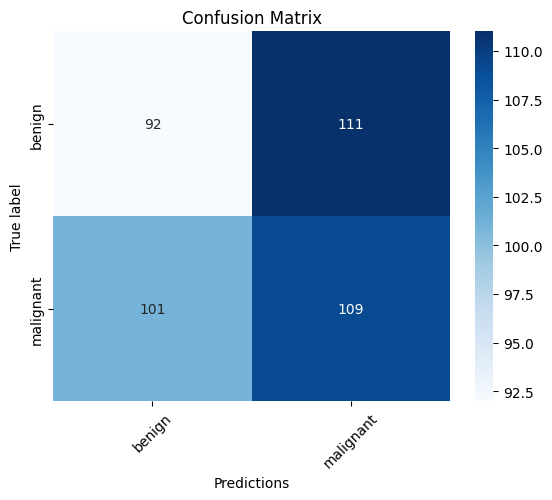

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

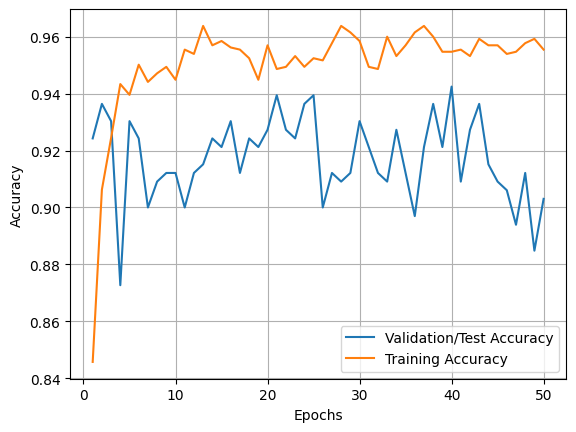

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

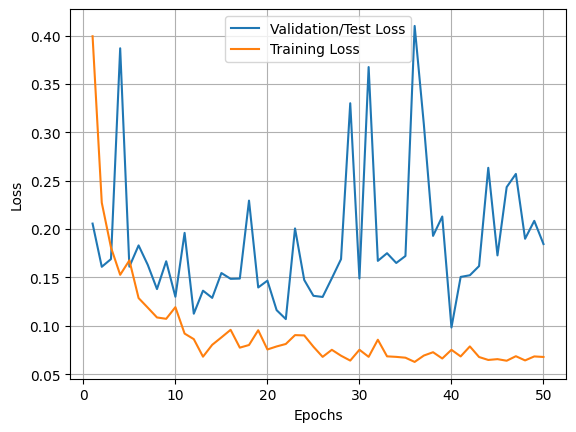

In [15]:


import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121

# Load the pre-trained DenseNet121 model (without top layers)
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()






# **EXCEPTION**

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

=-----------------------------------------------
Epoch 1/50
  3/265 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.6444 - loss: 0.5871 

W0000 00:00:1719941193.908067     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


242/265 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7731 - loss: 0.6143

W0000 00:00:1719941207.087732     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7780 - loss: 0.5991

W0000 00:00:1719941211.047969     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.7784 - loss: 0.5977 - val_accuracy: 0.9061 - val_loss: 0.1885
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9058 - loss: 0.2139 - val_accuracy: 0.8879 - val_loss: 0.4531
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9308 - loss: 0.1608 - val_accuracy: 0.9091 - val_loss: 0.2684
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9488 - loss: 0.1134 - val_accuracy: 0.9061 - val_loss: 0.2375
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9468 - loss: 0.1309 - val_accuracy: 0.9121 - val_loss: 0.2406
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9435 - loss: 0.1280 - val_accuracy: 0.9061 - val_loss: 0.3737
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9315 - loss: 0.1601 - val_accuracy: 0.8818 - val_loss: 0.3937
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9461 - loss: 0.1202 - val_accurac

W0000 00:00:1719941779.109745     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.1345413625240326
Test Accuracy: 0.9418886303901672
 8/83 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

W0000 00:00:1719941781.966861     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step


W0000 00:00:1719941787.726668     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       0.48      0.47      0.48       203
           1       0.50      0.51      0.50       210

    accuracy                           0.49       413
   macro avg       0.49      0.49      0.49       413
weighted avg       0.49      0.49      0.49       413



Confusion Matrix:
 [[ 96 107]
 [103 107]]


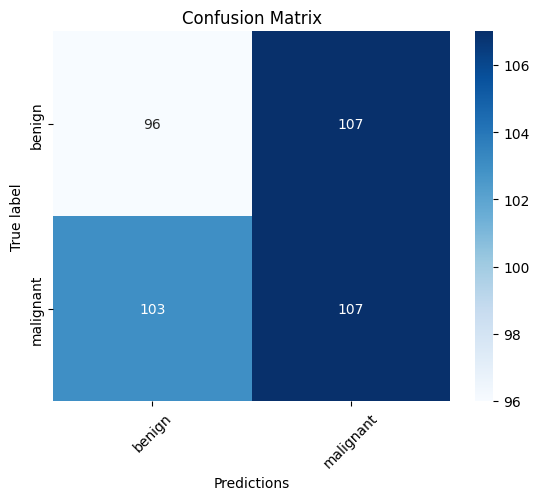

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

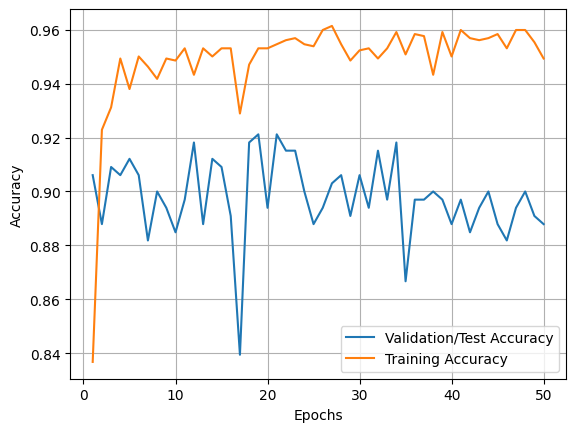

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

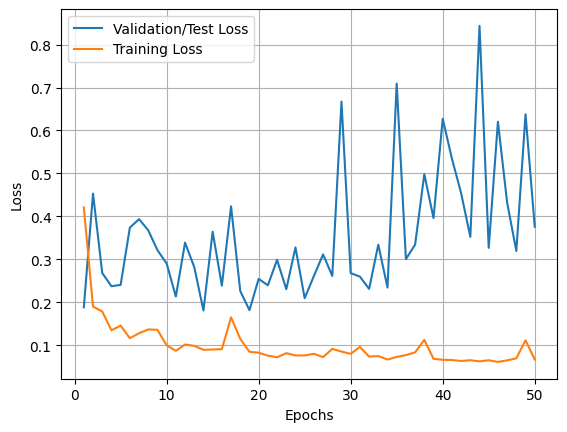

In [16]:
from tensorflow.keras.applications import Xception

# Create the Xception base model
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()





# **EfficientNet50**

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ ?                      │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 64,097,687 (244.51 MB)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ ?                      │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 64,097,687 (244.51 MB)

=-----------------------------------------------
Epoch 1/50
  3/265 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.5778 - loss: 2.2815  

W0000 00:00:1719943151.661140     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


258/265 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.4999 - loss: 1.0925

W0000 00:00:1719943261.969299     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.4995 - loss: 1.0901

W0000 00:00:1719943278.785847     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 257s 494ms/step - accuracy: 0.4995 - loss: 1.0897 - val_accuracy: 0.5091 - val_loss: 1.0426
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.4931 - loss: 0.9425 - val_accuracy: 0.4909 - val_loss: 0.6922
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.5147 - loss: 0.8639 - val_accuracy: 0.5091 - val_loss: 0.6969
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.4711 - loss: 0.7894 - val_accuracy: 0.5091 - val_loss: 0.7716
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.4480 - loss: 0.7938 - val_accuracy: 0.4909 - val_loss: 0.6915
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.4974 - loss: 0.7635 - val_accuracy: 0.4909 - val_loss: 0.8089
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.5117 - loss: 0.7366 - val_accuracy: 0.4909 - val_loss: 0.6945
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.4815 - loss: 0.7412 - val_accur

W0000 00:00:1719944390.758609     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.693003237247467
Test Accuracy: 0.508474588394165
 4/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step 

W0000 00:00:1719944406.895583     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 36s 240ms/step


W0000 00:00:1719944426.562241     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.51      1.00      0.67       210

    accuracy                           0.51       413
   macro avg       0.25      0.50      0.34       413
weighted avg       0.26      0.51      0.34       413



Confusion Matrix:
 [[  0 203]
 [  0 210]]


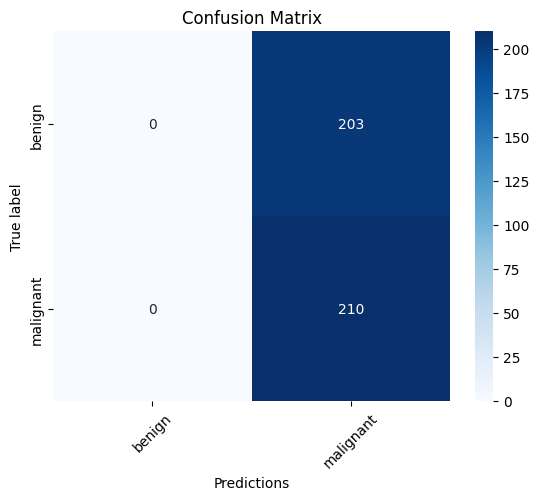

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

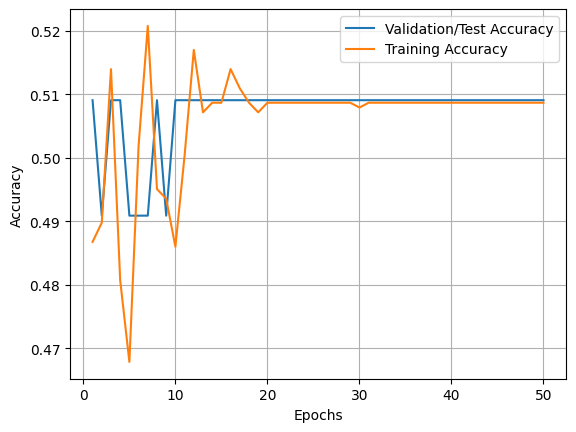

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

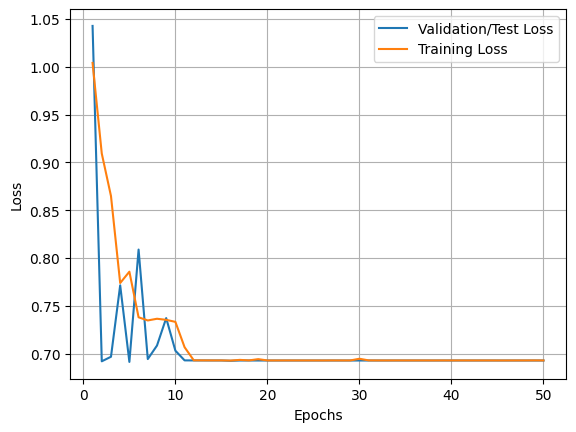

In [22]:
from tensorflow.keras.applications import EfficientNetB7

base_model = EfficientNetB7(input_shape = (224, 224, 3),
                         include_top = False,
                         weights = 'imagenet')

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()






In [ ]:
keras.applications.EfficientNetV2B3(

52606240/52606240 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b3 (Functional)  │ ?                      │    12,930,622 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,930,622 (49.33 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b3 (Functional)  │ ?                      │    12,930,622 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,930,622 (49.33 MB)

=-----------------------------------------------
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/265 ━━━━━━━━━━━━━━━━━━━━ 5:04:24 69s/step - accuracy: 0.6000 - loss: 0.9130

I0000 00:00:1719953221.323294     140 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719953221.411439     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 48/265 ━━━━━━━━━━━━━━━━━━━━ 3:41 1s/step - accuracy: 0.5737 - loss: 1.1050

W0000 00:00:1719953269.160054     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5349 - loss: 0.9466

W0000 00:00:1719953289.831438     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 141s 272ms/step - accuracy: 0.5348 - loss: 0.9460 - val_accuracy: 0.5091 - val_loss: 1.1609
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5171 - loss: 0.9046 - val_accuracy: 0.5091 - val_loss: 0.6936
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5120 - loss: 0.7932 - val_accuracy: 0.5091 - val_loss: 1.0394
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5219 - loss: 0.7478 - val_accuracy: 0.5091 - val_loss: 0.8574
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5059 - loss: 0.7242 - val_accuracy: 0.4909 - val_loss: 0.7771
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5094 - loss: 0.7264 - val_accuracy: 0.5091 - val_loss: 0.7634
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5072 - loss: 0.7257 - val_accuracy: 0.4909 - val_loss: 0.6903
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5133 - loss: 0.7410 - val_accuracy: 0.

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.5600 - loss: 0.6913


W0000 00:00:1719953743.548230     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.6930038332939148
Test Accuracy: 0.508474588394165
 8/83 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

W0000 00:00:1719953751.429495     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step


W0000 00:00:1719953761.555433     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.51      1.00      0.67       210

    accuracy                           0.51       413
   macro avg       0.25      0.50      0.34       413
weighted avg       0.26      0.51      0.34       413



Confusion Matrix:
 [[  0 203]
 [  0 210]]


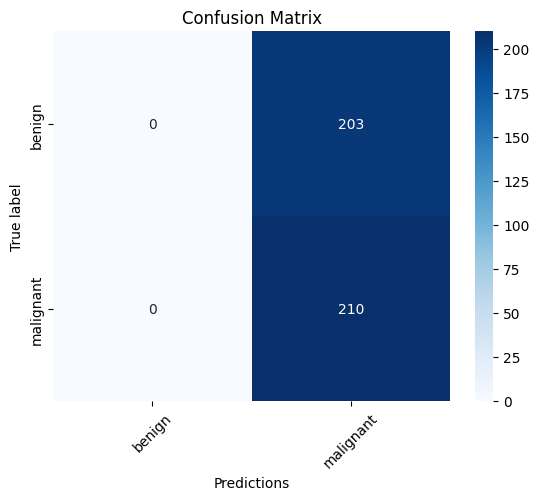

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

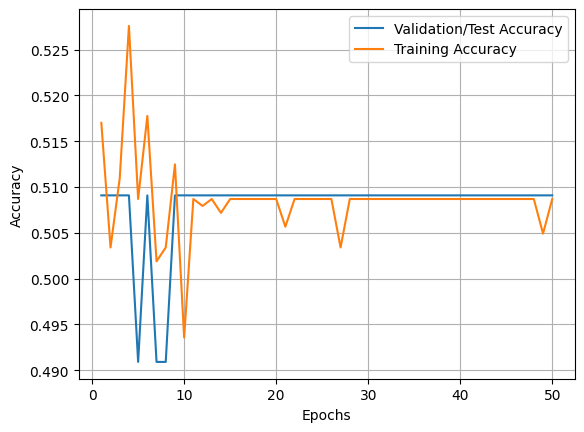

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

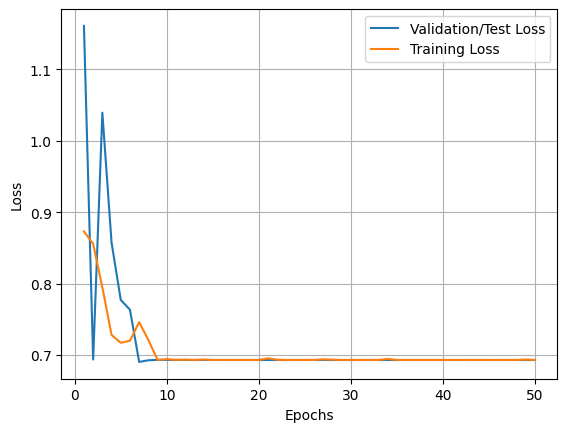

In [12]:
from tensorflow.keras.applications import EfficientNetV2B3

base_model = EfficientNetV2B3(input_shape = (224, 224, 3),
                         include_top = False,
                         weights = 'imagenet')

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()






35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b2 (Functional)  │ ?                      │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,769,374 (33.45 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b2 (Functional)  │ ?                      │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,769,374 (33.45 MB)

=-----------------------------------------------
Epoch 1/50
  5/265 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6520 - loss: 1.1453   

W0000 00:00:1719953822.237073     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 35/265 ━━━━━━━━━━━━━━━━━━━━ 4:21 1s/step - accuracy: 0.5549 - loss: 1.1735

W0000 00:00:1719953860.747764     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


263/265 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5173 - loss: 0.9413

W0000 00:00:1719953874.194589     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 111s 203ms/step - accuracy: 0.5172 - loss: 0.9404 - val_accuracy: 0.5091 - val_loss: 0.7598
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5350 - loss: 0.7816 - val_accuracy: 0.5091 - val_loss: 0.7827
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.4807 - loss: 0.7611 - val_accuracy: 0.5091 - val_loss: 0.6843
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.4999 - loss: 0.7346 - val_accuracy: 0.4909 - val_loss: 0.6927
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5403 - loss: 0.6996 - val_accuracy: 0.5091 - val_loss: 0.6908
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5217 - loss: 0.7010 - val_accuracy: 0.6061 - val_loss: 0.6897
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5010 - loss: 0.7045 - val_accuracy: 0.4909 - val_loss: 0.6932
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.4773 - loss: 0.6942 - val_accuracy: 0.

W0000 00:00:1719954307.333290     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.6930036544799805
Test Accuracy: 0.508474588394165
 7/83 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

W0000 00:00:1719954314.323194     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step


W0000 00:00:1719954324.391393     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.51      1.00      0.67       210

    accuracy                           0.51       413
   macro avg       0.25      0.50      0.34       413
weighted avg       0.26      0.51      0.34       413



Confusion Matrix:
 [[  0 203]
 [  0 210]]


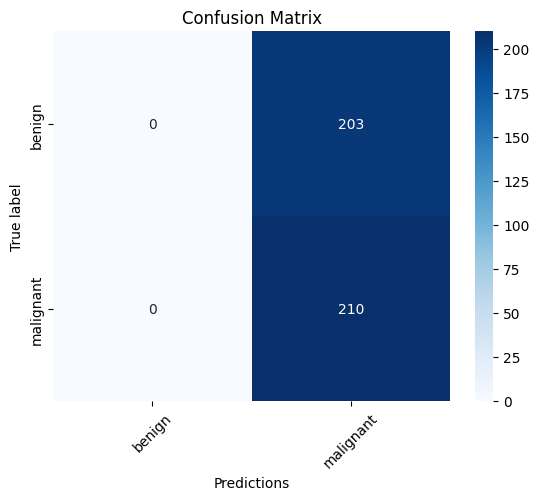

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

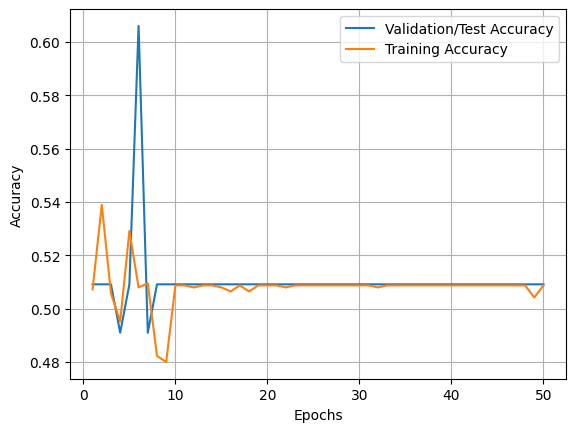

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

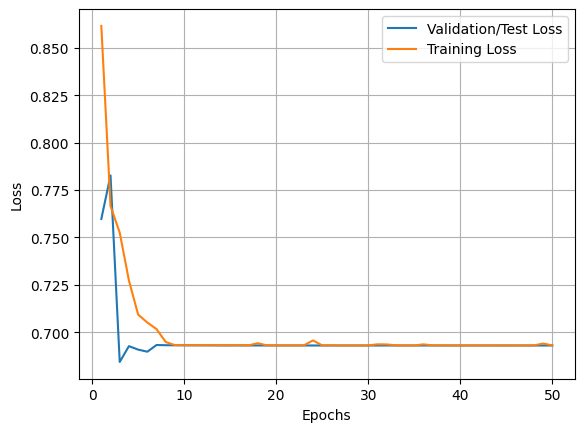

In [13]:
from tensorflow.keras.applications import EfficientNetV2B2

base_model = EfficientNetV2B2(input_shape = (224, 224, 3),
                         include_top = False,
                         weights = 'imagenet')

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()






Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b3 (Functional)  │ ?                      │    12,930,622 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,930,622 (49.33 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b3 (Functional)  │ ?                      │    12,930,622 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,930,622 (49.33 MB)

=-----------------------------------------------
Epoch 1/50
  5/265 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4840 - loss: 1.4377   

W0000 00:00:1719955931.154658     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


183/265 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.4955 - loss: 1.0460

W0000 00:00:1719955979.647027     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.4985 - loss: 1.0049

W0000 00:00:1719955990.674894     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 123s 233ms/step - accuracy: 0.4986 - loss: 1.0041 - val_accuracy: 0.7485 - val_loss: 0.6732
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5286 - loss: 0.8229 - val_accuracy: 0.4909 - val_loss: 0.7182
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5201 - loss: 0.7643 - val_accuracy: 0.6697 - val_loss: 0.6889
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4994 - loss: 0.7161 - val_accuracy: 0.5424 - val_loss: 0.6915
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4669 - loss: 0.7192 - val_accuracy: 0.5091 - val_loss: 0.6982
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5224 - loss: 0.7048 - val_accuracy: 0.4909 - val_loss: 0.6965
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.4935 - loss: 0.7184 - val_accuracy: 0.4909 - val_loss: 0.6963
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4917 - loss: 0.6959 - val_accuracy: 0.

W0000 00:00:1719956441.606811     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.6930205225944519
Test Accuracy: 0.508474588394165
 7/83 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

W0000 00:00:1719956449.092412     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step


W0000 00:00:1719956458.608455     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.51      1.00      0.67       210

    accuracy                           0.51       413
   macro avg       0.25      0.50      0.34       413
weighted avg       0.26      0.51      0.34       413



Confusion Matrix:
 [[  0 203]
 [  0 210]]


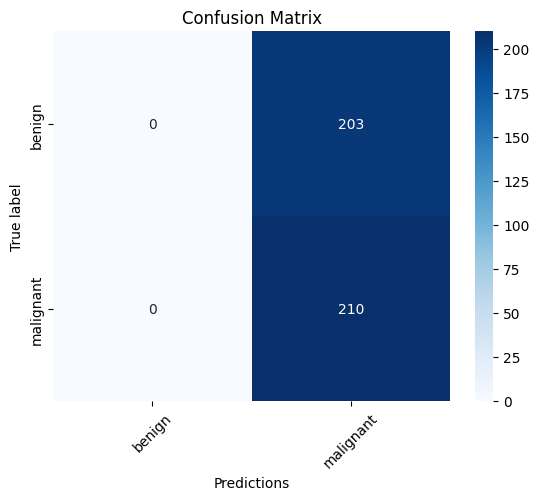

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

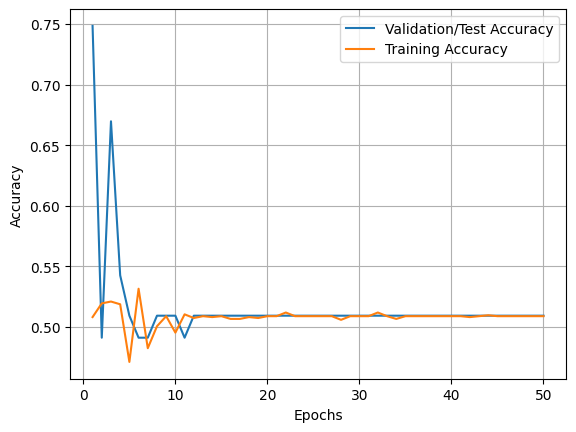

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

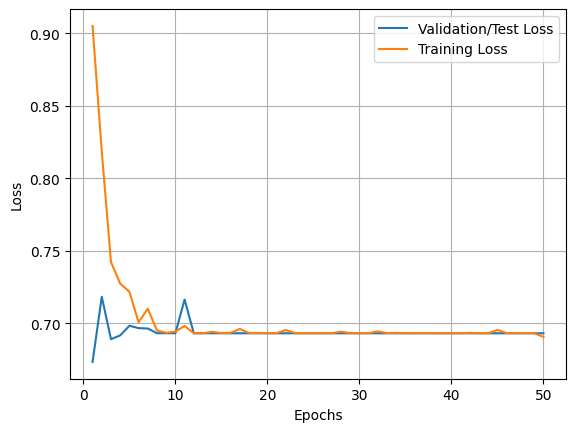

In [14]:
from tensorflow.keras.applications import EfficientNetV2B1

base_model = EfficientNetV2B3(input_shape = (224, 224, 3),
                         include_top = False,
                         weights = 'imagenet')

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()






Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b3 (Functional)  │ ?                      │    12,930,622 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,930,622 (49.33 MB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b3 (Functional)  │ ?                      │    12,930,622 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,930,622 (49.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,930,622 (49.33 MB)

=-----------------------------------------------
Epoch 1/50
  5/265 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.4373 - loss: 2.0204   

W0000 00:00:1719956523.673419     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


183/265 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - accuracy: 0.5122 - loss: 0.9943

W0000 00:00:1719956569.232755     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


264/265 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5122 - loss: 0.9468

W0000 00:00:1719956580.539139     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


265/265 ━━━━━━━━━━━━━━━━━━━━ 121s 222ms/step - accuracy: 0.5122 - loss: 0.9459 - val_accuracy: 0.5091 - val_loss: 0.7463
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4825 - loss: 0.8232 - val_accuracy: 0.4909 - val_loss: 0.7056
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5258 - loss: 0.7630 - val_accuracy: 0.4909 - val_loss: 0.7805
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4800 - loss: 0.7355 - val_accuracy: 0.4909 - val_loss: 0.7543
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4850 - loss: 0.7180 - val_accuracy: 0.5091 - val_loss: 0.6915
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5084 - loss: 0.7038 - val_accuracy: 0.5091 - val_loss: 0.6907
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5149 - loss: 0.7199 - val_accuracy: 0.5091 - val_loss: 0.6916
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4954 - loss: 0.7091 - val_accuracy: 0.

W0000 00:00:1719957027.419464     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.693007230758667
Test Accuracy: 0.508474588394165
 8/83 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

W0000 00:00:1719957034.938637     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step


W0000 00:00:1719957044.451557     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.51      1.00      0.67       210

    accuracy                           0.51       413
   macro avg       0.25      0.50      0.34       413
weighted avg       0.26      0.51      0.34       413



Confusion Matrix:
 [[  0 203]
 [  0 210]]


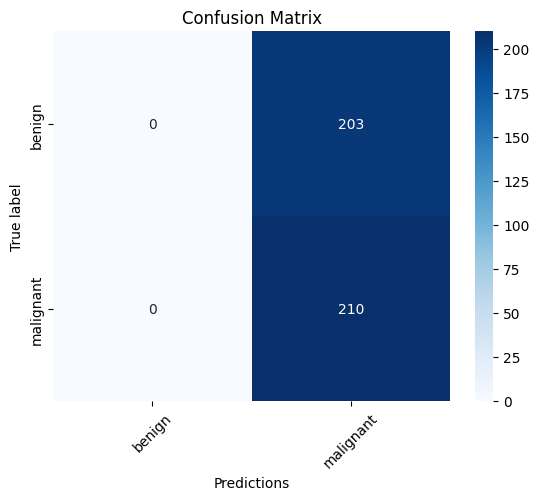

-----------------------------
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Pa

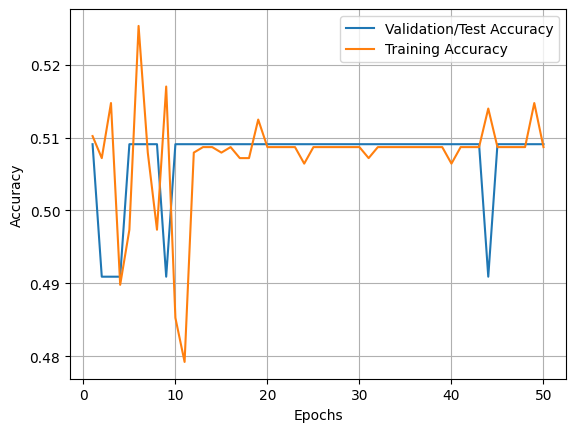

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

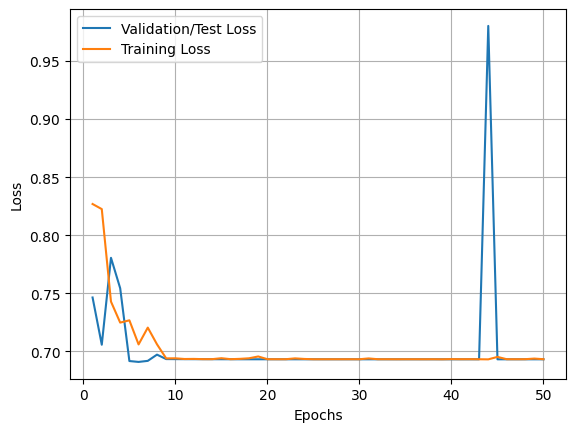

In [15]:
from tensorflow.keras.applications import EfficientNetV2B0

base_model = EfficientNetV2B3(input_shape = (224, 224, 3),
                         include_top = False,
                         weights = 'imagenet')

NUM_CLASSES = 2
resnet_model = tf.keras.Sequential()
resnet_model.add(base_model)
resnet_model.add(Flatten())

resnet_model.add(layers.Flatten())
# dummy_input = tf.zeros((1, 224, 224, 3))
# _ = resnet_model(dummy_input)


# intermediate_features = resnet_model.layers[-1].output
# attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
# attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
# attention_output = layers.Multiply()([intermediate_features, attention_weights])


resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(256, activation='relu'))
# vgg_model.add(layers.Dropout(0.25))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(NUM_CLASSES, activation='softmax'))

resnet_model.layers[0].trainable = False




resnet_model.summary()


optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.CategoricalCrossentropy()
metrics=['accuracy']
resnet_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)






# Compile the model
# resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

print("=-----------------------------------------------")

epochs=50
batch_size=32
history=resnet_model.fit(train_data,epochs=epochs,batch_size=batch_size,validation_data=val_data)


print("------------------------------------------------------")


#one line code for all model judgement





from matplotlib import pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns






# Put Value of your model here
mode_lfor_evaluation=resnet_model



test_loss, test_accuracy = mode_lfor_evaluation.evaluate(test_data)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
predictions_prob = resnet_model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

conf_mat = confusion_matrix(true_label,predictions)
print("\n\nConfusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat ,fmt='g',annot = True , cmap='Blues' , xticklabels=test_classes , yticklabels = test_classes,)
plt.xlabel('Predictions')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(rotation = 45)
plt.show()

print("-----------------------------")


history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()





# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()




